# TechHorizon Internship - Task 1
### Classify Handwritten Digits Using a Simple Neural Network (MNIST Dataset)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)


In [9]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# flatten images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [10]:
# Build the model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [13]:
# Train the model with validation data
history = model.fit(X_train, y_train_cat,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=early_stop,
                    verbose=2)


Epoch 1/15
375/375 - 2s - loss: 0.3742 - accuracy: 0.8947 - val_loss: 0.1783 - val_accuracy: 0.9476 - 2s/epoch - 6ms/step
Epoch 2/15
375/375 - 2s - loss: 0.1533 - accuracy: 0.9548 - val_loss: 0.1395 - val_accuracy: 0.9592 - 2s/epoch - 4ms/step
Epoch 3/15
375/375 - 1s - loss: 0.1068 - accuracy: 0.9683 - val_loss: 0.1105 - val_accuracy: 0.9678 - 1s/epoch - 4ms/step
Epoch 4/15
375/375 - 1s - loss: 0.0805 - accuracy: 0.9757 - val_loss: 0.0976 - val_accuracy: 0.9697 - 1s/epoch - 3ms/step
Epoch 5/15
375/375 - 1s - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.0902 - val_accuracy: 0.9723 - 1s/epoch - 3ms/step
Epoch 6/15
375/375 - 1s - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0888 - val_accuracy: 0.9731 - 1s/epoch - 4ms/step
Epoch 7/15
375/375 - 1s - loss: 0.0388 - accuracy: 0.9889 - val_loss: 0.0898 - val_accuracy: 0.9740 - 1s/epoch - 4ms/step
Epoch 8/15
375/375 - 1s - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0872 - val_accuracy: 0.9745 - 1s/epoch - 4ms/step
Epoch 9/15
375/375 - 1s 

In [14]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=1)
print(f" Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9766
 Test Accuracy: 0.9766


In [15]:
# save model
model.save('Final_Digit_Classify_model.h5')


In [16]:
# Step 8: Predict and decode
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


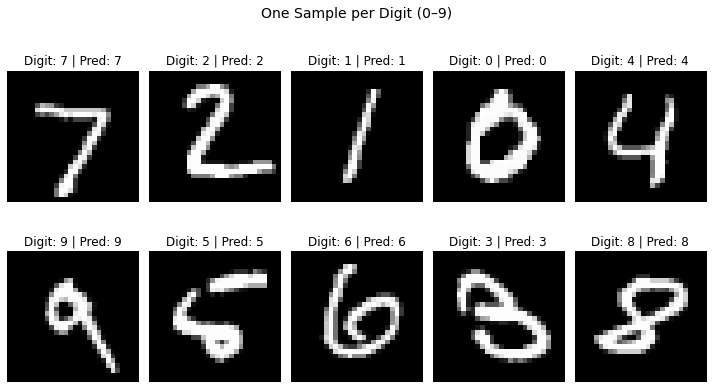

In [17]:
# Show 1 image for each digit from 0 to 9
plt.figure(figsize=(10, 6))
shown_digits = set()
shown = 0

for i in range(len(X_test)):
    label = y_test[i]
    if label not in shown_digits:
        plt.subplot(2, 5, shown + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {label} | Pred: {y_pred_classes[i]}")
        plt.axis('off')
        shown_digits.add(label)
        shown += 1
    if shown == 10:
        break

plt.suptitle("One Sample per Digit (0–9)", fontsize=14)
plt.tight_layout()
plt.show()


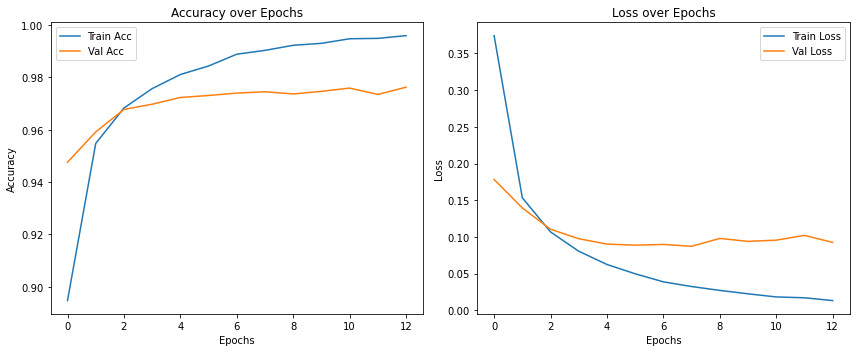

In [18]:
# Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report & Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



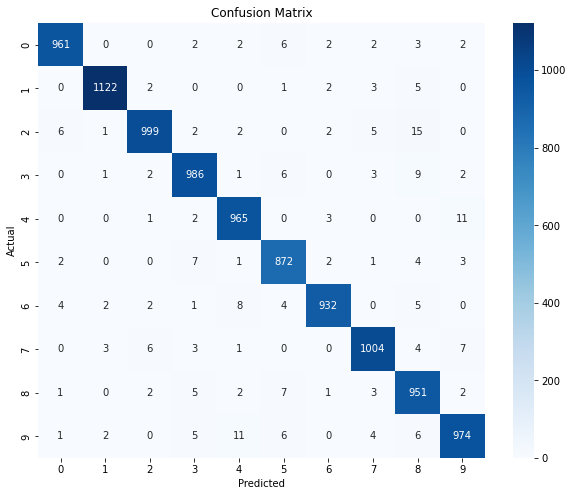

In [20]:
# Confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()